In [15]:
import networkx as nx
from smodels.theory.model import Model
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from smodels.experiment.finalStateParticles import finalStates

In [2]:
slhafile = 'inputFiles/slha/lightEWinos.slha'
#Define your model
model = Model(inputFile=slhafile, BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles()

In [3]:
gluino = model.getParticlesWith(pdg = 1000021)[0]
n1 = model.getParticlesWith(pdg = 1000022)[0]
q = model.getParticlesWith(pdg = 2)[0]

In [4]:
G = nx.DiGraph()
G.add_node('PV')
G.add_node('A',particle=gluino)
G.add_node('a',particle=gluino)
G.add_node('B_1',particle=n1)
G.add_node('B_2',particle=q)
G.add_node('B_3',particle=q)
G.add_node('b_1',particle=n1)
G.add_node('b_2',particle=q)
G.add_node('b_3',particle=q)
G.add_edges_from([('PV','A'),('PV','a')])
G.add_edges_from([('A','B_1'),('A','B_2'),('A','B_3')])
G.add_edges_from([('a','b_1'),('a','b_2'),('a','b_3')])

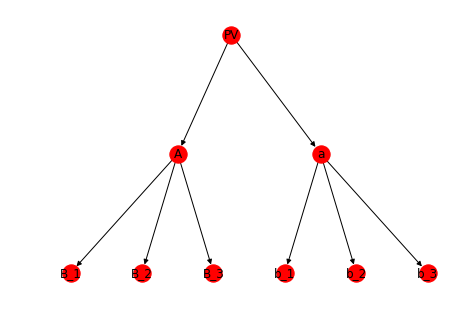

In [5]:
pos =graphviz_layout(G, prog='dot')
nx.draw(G,pos,with_labels=True,arrows=True)
plt.show()

In [66]:
def fromGraphToBrackets(G,node):
    dList = []
    if list(G.successors(node)):
        for daughter in G.successors(node):
            if list(G.successors(daughter)):
                dList.append(fromGraphToBrackets(G,daughter))
            else:
                if G.nodes[daughter]['particle'].Z2parity == 'even':
                    dList.append(G.nodes[daughter]['particle'])
    return dList

def fromListToGraphs(bList,model,parentNode=0):
    anyOdd = model.getParticlesWith(label='anyOdd')[0]
    #Create graph and branches
    G = nx.DiGraph()
    node = parentNode
    nodeLevel = 10**int(np.log10(max(x,1))
    if not parentNode:
        G.add_node(parentNode)
        for vList in bList:
            G.add_node(G.number_of_nodes(),particle=anyOdd)
            subG = fromListToGraphs(vList,model,parentNode=G.number_of_nodes())
            G = nx.compose(G,subG)
        return G
    elif isinstance(bList,list):
        for vList in bList:
            if isinstance(vList,list):
                G.add_node(node,particle=anyOdd)
                G.add_edge(parentNode,node)                
                subG = fromListToGraphs(vList,model,parenteNode=node)
                G = nx.compose(G,subG)
            elif isinstance(vList,string):
                ptc = model.getParticlesWith(label=vList)[0]
                G.add_node(node+1,particle=ptc)
                G.add_edge(parentNode,node)
        
    #For each branch create a sequential tree
    for vList in bList:
        
            
G.add_node('A',particle=gluino)


In [31]:
def fromListToGraphs(bList,model,node=0,parentNode=0):
    anyOdd = model.getParticlesWith(label='anyOdd')[0]
    #Create graph and branches
    G = nx.DiGraph()
    G.add_node(parentNode)
    if isinstance(bList,str):
        ptc = model.getParticlesWith(label=bList)[0]
        G.add_node(node,particle=ptc)
        G.add_edge(parentNode,node)        
        return G
    elif isinstance(bList,list):        
        daughterLevel = 10**int(np.log10(max(1,parentNode))) #Get node level (Add digit everytime you increase one level)
        daughterNode = daughterLevel
        for vList in bList:
            G.add_node(node,particle=anyOdd)
            G.add_edge(node,parentNode)
            subG = fromListToGraphs(vList,model,node=,parentNode=node)
            G = nx.compose(G,subG)
            node += 1
        return G

In [32]:
bList = [['e-','mu+'],['photon']]

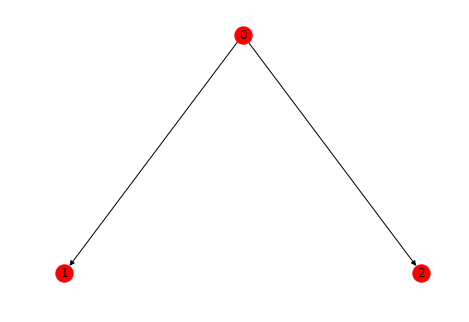

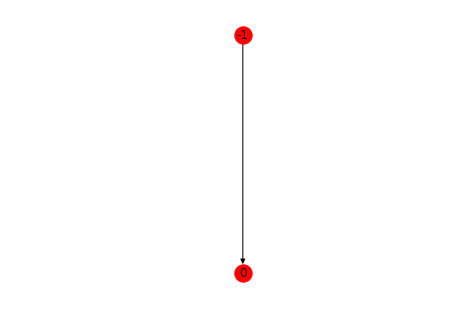

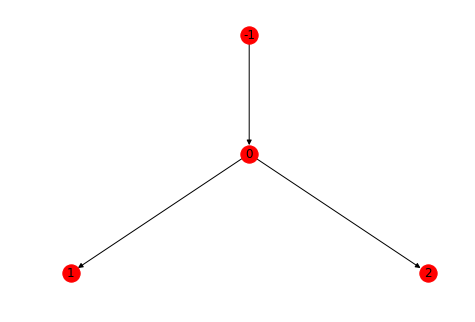

In [35]:
G = nx.DiGraph()
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_edges_from([(0,1),(0,2)])
pos =graphviz_layout(G, prog='dot')
nx.draw(G,pos,with_labels=True,arrows=True)
plt.show()

H = nx.DiGraph()
H.add_node(0)
H.add_node(-1)
H.add_edge(-1,0)
pos =graphviz_layout(H, prog='dot')
nx.draw(H,pos,with_labels=True,arrows=True)
plt.show()

G = nx.compose(G,H)
pos =graphviz_layout(G, prog='dot')
nx.draw(G,pos,with_labels=True,arrows=True)
plt.show()

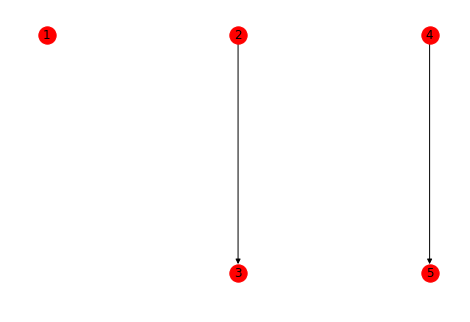

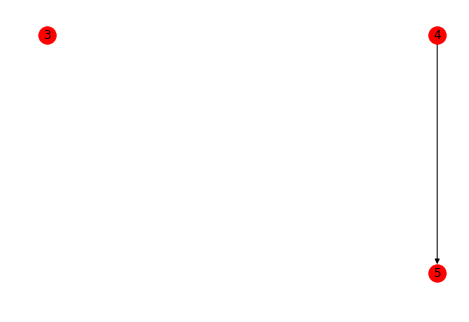

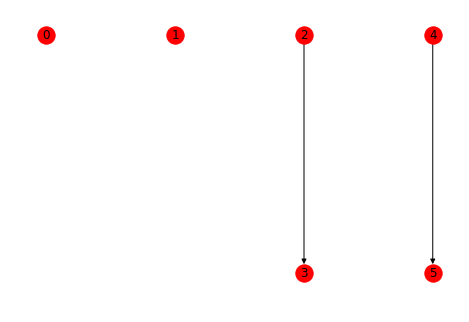

In [33]:
G = fromListToGraphs(bList,finalStates)

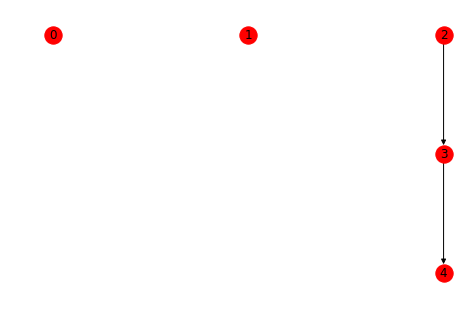

In [30]:
pos =graphviz_layout(G, prog='dot')
nx.draw(G,pos,with_labels=True,arrows=True)
plt.show()

In [36]:
import numpy as np

In [45]:
x = 0
10**int(np.log10(max(x,1)))

1